In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv(""Warehouse_and_Retail_Sales.csv)
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [4]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [7]:
# Handling empty values
# Suppliers
missing_supplier_indices=df[df['SUPPLIER'].isnull()].index
# most frequent supplier for the same data type
supplier_by_item_type=df.dropna(subset=['SUPPLIER']).groupby('ITEM TYPE')['SUPPLIER'].agg(lambda x:x.mode()[0] if not x.mode().empty else None).to_dict()
# most frequent supplier for the dataset
overall_most_frequent_supplier=df['SUPPLIER'].mode()[0] if not df['SUPPLIER'].mode().empty else "unknown supplier"
# fill null values
for index in missing_supplier_indices:
    item_type_for_missing_supplier=df.loc[index,'ITEM TYPE']
    
    if pd.isna(item_type_for_missing_supplier) or item_type_for_missing_supplier  not in supplier_by_item_type or supplier_by_item_type[item_type_for_missing_supplier] is None :
        df.loc[index,'SUPPLIER']=overall_most_frequent_supplier
        print("item type is null or don't have mode value")
    else:
        df.loc[index,'SUPPLIER']=supplier_by_item_type[item_type_for_missing_supplier]
        print("fill na based on item type")

print(df['SUPPLIER'].isnull().sum())


fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
fill na based on item type
f

In [8]:
#handling item type null val
df['ITEM TYPE'].fillna(df['ITEM TYPE'].mode()[0],inplace=True)
df['ITEM TYPE'].isnull().sum()

C:\Users\2021\AppData\Local\Temp\ipykernel_20508\569302171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ITEM TYPE'].fillna(df['ITEM TYPE'].mode()[0],inplace=True)


np.int64(0)

In [9]:
df.dropna()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.0,1.00
307641,2020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.0,3586.88
307642,2020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.0,4.00
307643,2020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.0,2.00


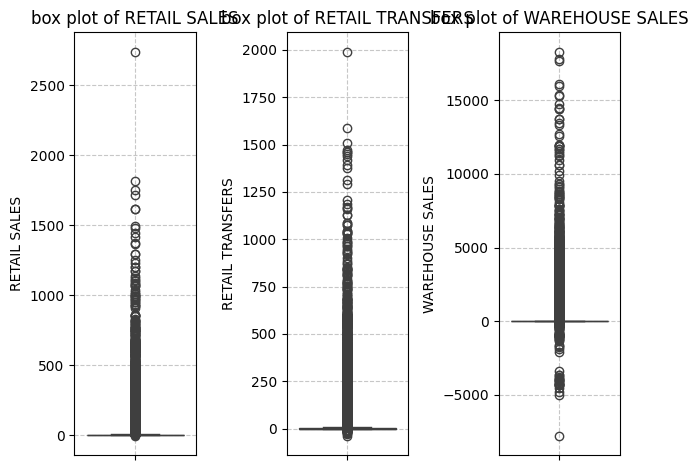

In [10]:
# check outliers
columns_to_check = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

plt.Figure(figsize=(20,5))
for i ,col in enumerate(columns_to_check):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f"box plot of {col}")
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

In [11]:
# handling SUPPLIER , ITEM TYPE 
df['SUPPLIER']=df['SUPPLIER'].str.lower()
df['ITEM TYPE']=df['ITEM TYPE'].str.lower()
print(df['SUPPLIER'].unique()[:10])
print(df['ITEM TYPE'].unique())


['republic national distributing co' 'pwswn inc' 'reliable churchill lllp'
 'lanterna distributors inc' 'dionysos imports inc'
 'kysela pere et fils ltd' 'santa margherita usa inc'
 'brown-forman beverages worldwide' 'jim beam brands co'
 'international cellars llc']
['wine' 'beer' 'liquor' 'str_supplies' 'kegs' 'ref' 'dunnage'
 'non-alcohol']


In [12]:
#create new col for date 
df['Date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01')
df.head(3)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Date
0,2020,1,republic national distributing co,100009,BOOTLEG RED - 750ML,wine,0.0,0.0,2.0,2020-01-01
1,2020,1,pwswn inc,100024,MOMENT DE PLAISIR - 750ML,wine,0.0,1.0,4.0,2020-01-01
2,2020,1,reliable churchill lllp,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,beer,0.0,0.0,1.0,2020-01-01


C:\Users\2021\AppData\Local\Temp\ipykernel_20508\1618645081.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_trends = df.groupby('Month_Name').agg(


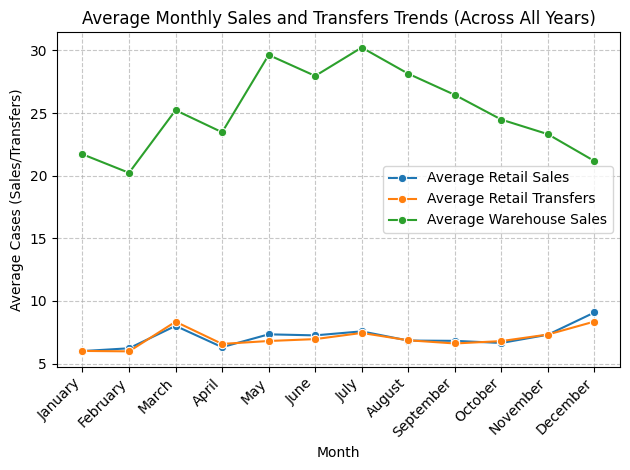

In [13]:
# line plot for selling trends
#collect monthly sales data

df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)
monthly_avg_trends = df.groupby('Month_Name').agg(
    {'RETAIL SALES': 'mean',
     'RETAIL TRANSFERS': 'mean',
     'WAREHOUSE SALES': 'mean'}
).reset_index()
monthly_avg_trends = monthly_avg_trends.sort_values('Month_Name')

sns.lineplot(x='Month_Name', y='RETAIL SALES', data=monthly_avg_trends, label='Average Retail Sales', marker='o')
sns.lineplot(x='Month_Name', y='RETAIL TRANSFERS', data=monthly_avg_trends, label='Average Retail Transfers', marker='o')
sns.lineplot(x='Month_Name', y='WAREHOUSE SALES', data=monthly_avg_trends, label='Average Warehouse Sales', marker='o')

plt.title('Average Monthly Sales and Transfers Trends (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Average Cases (Sales/Transfers)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.savefig('average_monthly_trends.png')
plt.show()

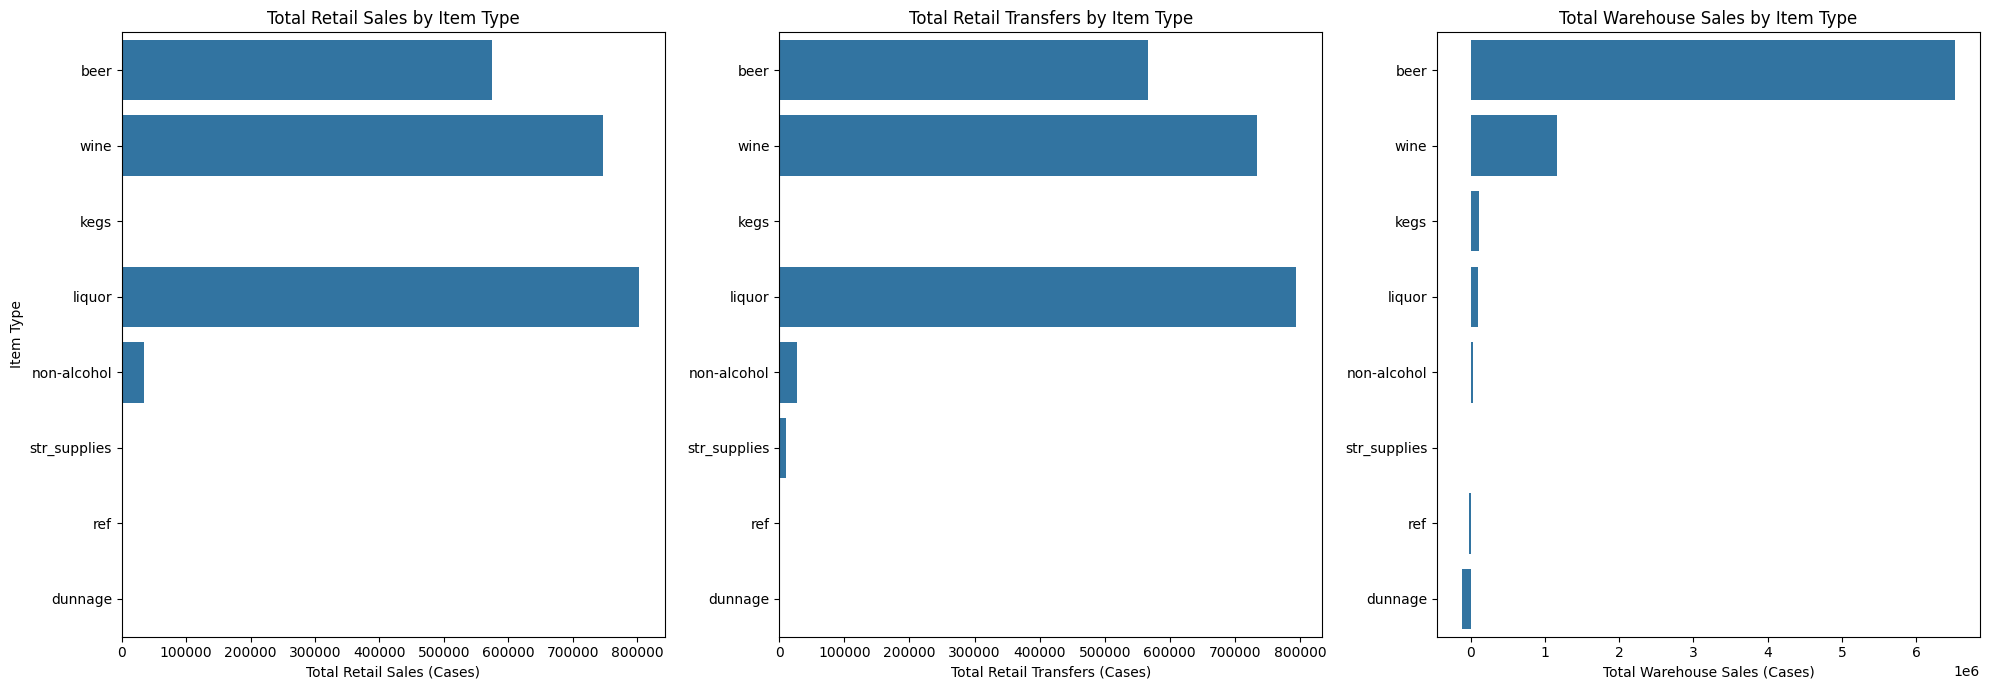

In [14]:
# create bar chart for sels per item type 
item_type_summary = df.groupby('ITEM TYPE').agg(
    {'RETAIL SALES': 'sum',
     'RETAIL TRANSFERS': 'sum',
     'WAREHOUSE SALES': 'sum'}
).reset_index()
item_type_summary_sorted = item_type_summary.sort_values(by='WAREHOUSE SALES', ascending=False)
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
#  plot RETAIL SALES
sns.barplot(x='RETAIL SALES', y='ITEM TYPE', data=item_type_summary_sorted, ax=axes[0])
axes[0].set_title('Total Retail Sales by Item Type')
axes[0].set_xlabel('Total Retail Sales (Cases)')
axes[0].set_ylabel('Item Type')

# plot RETAIL TRANSFERS
sns.barplot(x='RETAIL TRANSFERS', y='ITEM TYPE', data=item_type_summary_sorted, ax=axes[1])
axes[1].set_title('Total Retail Transfers by Item Type')
axes[1].set_xlabel('Total Retail Transfers (Cases)')
axes[1].set_ylabel('') 

# plot WAREHOUSE SALES
sns.barplot(x='WAREHOUSE SALES', y='ITEM TYPE', data=item_type_summary_sorted, ax=axes[2])
axes[2].set_title('Total Warehouse Sales by Item Type')
axes[2].set_xlabel('Total Warehouse Sales (Cases)')
axes[2].set_ylabel('') 

plt.tight_layout() 

plt.show() 

In [15]:
liquor_warehouse_sales = df[df['ITEM TYPE'] == 'liquor']['WAREHOUSE SALES']

# total_liquor_warehouse_sales LIQUOR
total_liquor_warehouse_sales = liquor_warehouse_sales.sum()

# positive_liquor_warehouse_sales LIQUOR
positive_liquor_warehouse_sales = liquor_warehouse_sales[liquor_warehouse_sales > 0].sum()

# negative_liquor_warehouse_sales LIQUOR
negative_liquor_warehouse_sales = liquor_warehouse_sales[liquor_warehouse_sales < 0].sum()


print(f"Total WAREHOUSE SALES for LIQUOR: {total_liquor_warehouse_sales:.2f}")
print(f"Positive WAREHOUSE SALES for LIQUOR (actual sales): {positive_liquor_warehouse_sales:.2f}")
print(f"Negative WAREHOUSE SALES for LIQUOR (returns/adjustments): {negative_liquor_warehouse_sales:.2f}")


num_positive = liquor_warehouse_sales[liquor_warehouse_sales > 0].count()
num_negative = liquor_warehouse_sales[liquor_warehouse_sales < 0].count()
num_zero = liquor_warehouse_sales[liquor_warehouse_sales == 0].count()

print(f"Number of positive WAREHOUSE SALES transactions for LIQUOR: {num_positive}")
print(f"Number of negative WAREHOUSE SALES transactions for LIQUor: {num_negative}")
print(f"Number of zero WAREHOUSE SALES transactions for LIQUOR: {num_zero}")


Total WAREHOUSE SALES for LIQUOR: 94906.27
Positive WAREHOUSE SALES for LIQUOR (actual sales): 95004.19
Negative WAREHOUSE SALES for LIQUOR (returns/adjustments): -97.92
Number of positive WAREHOUSE SALES transactions for LIQUOR: 12928
Number of negative WAREHOUSE SALES transactions for LIQUor: 37
Number of zero WAREHOUSE SALES transactions for LIQUOR: 51945


top15 supplier pased on total sales:
                     SUPPLIER  RETAIL SALES  RETAIL TRANSFERS  \
81              crown imports      84437.66          82832.76   
214    miller brewing company      87156.44          85223.79   
15         anheuser busch inc     109960.82         108231.02   
158              heineken usa      56139.91          54860.42   
108        e & j gallo winery     166170.53         165021.82   
91   diageo north america inc     145343.20         144013.71   
76       constellation brands     131664.79         129761.80   
43    boston beer corporation      40129.13          40103.21   
344            the wine group      64270.04          63855.03   
173        jim beam brands co      96164.04          95229.37   
125   flying dog brewery lllp      26358.55          26001.38   
393         yuengling brewery      23027.70          22402.13   
293                sazerac co      70414.62          68983.37   
26            bacardi usa inc      66610.23          

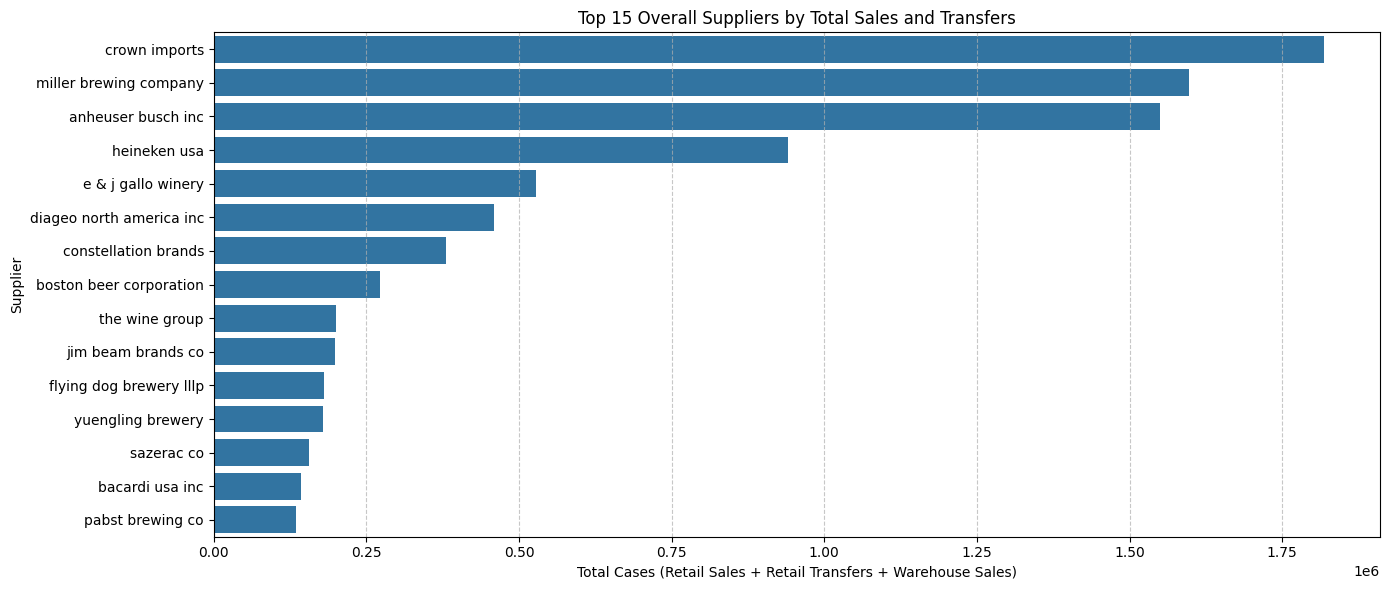

In [16]:
# bar chart for top 15 supplier 
supplier_overall_sales = df.groupby('SUPPLIER').agg(
    {'RETAIL SALES': 'sum',
     'RETAIL TRANSFERS': 'sum',
     'WAREHOUSE SALES': 'sum'}
).reset_index()

supplier_overall_sales['TOTAL SALES'] = supplier_overall_sales['RETAIL SALES'] + \
                                       supplier_overall_sales['RETAIL TRANSFERS'] + \
                                       supplier_overall_sales['WAREHOUSE SALES']
supplier_overall_sales_sorted = supplier_overall_sales.sort_values(by='TOTAL SALES', ascending=False)


top_n_suppliers = 15
print(f"top{top_n_suppliers} supplier pased on total sales:")
print(supplier_overall_sales_sorted.head(top_n_suppliers))


plt.figure(figsize=(14, 6))
sns.barplot(x='TOTAL SALES', y='SUPPLIER', data=supplier_overall_sales_sorted.head(top_n_suppliers))
plt.title(f'Top {top_n_suppliers} Overall Suppliers by Total Sales and Transfers')
plt.xlabel('Total Cases (Retail Sales + Retail Transfers + Warehouse Sales)')
plt.ylabel('Supplier')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()






 top 10 suppliers for BEER (based on total units:
                     SUPPLIER  TOTAL_CASES
28              crown imports   1815074.93
65     miller brewing company   1575269.24
4          anheuser busch inc   1558021.95
51               heineken usa    934506.26
15    boston beer corporation    263896.16
32   diageo north america inc    205876.78
43    flying dog brewery lllp    175876.42
109         yuengling brewery    171597.69
74           pabst brewing co    133269.93
59                legends ltd    109458.85


C:\Users\2021\AppData\Local\Temp\ipykernel_20508\3859270139.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOTAL_CASES', y='SUPPLIER', data=supplier_summary_by_item_sorted.head(10), palette='viridis')


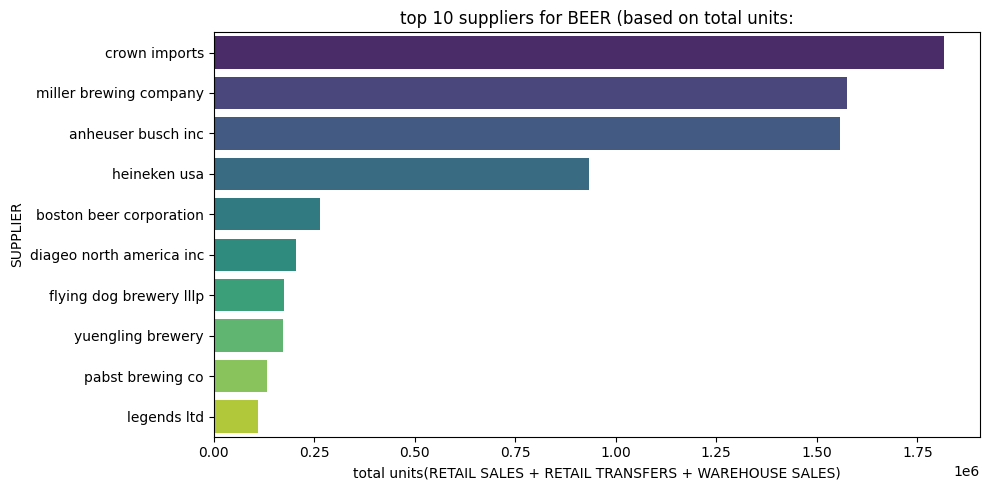


 top 10 suppliers for WINE (based on total units:
                                   SUPPLIER  TOTAL_CASES
63                       e & j gallo winery    462401.81
44                     constellation brands    333914.63
232                          the wine group    200316.64
221                  sutter home winery inc    117814.28
238  treasury wine estates americas company    103088.85
51                delicato family vineyards    100014.90
52            deutsch family wine & spirits     96711.42
111          jackson family enterprises inc     89341.00
181       republic national distributing co     66916.09
208       southern glazers wine and spirits     64537.71


C:\Users\2021\AppData\Local\Temp\ipykernel_20508\3859270139.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOTAL_CASES', y='SUPPLIER', data=supplier_summary_by_item_sorted.head(10), palette='viridis')


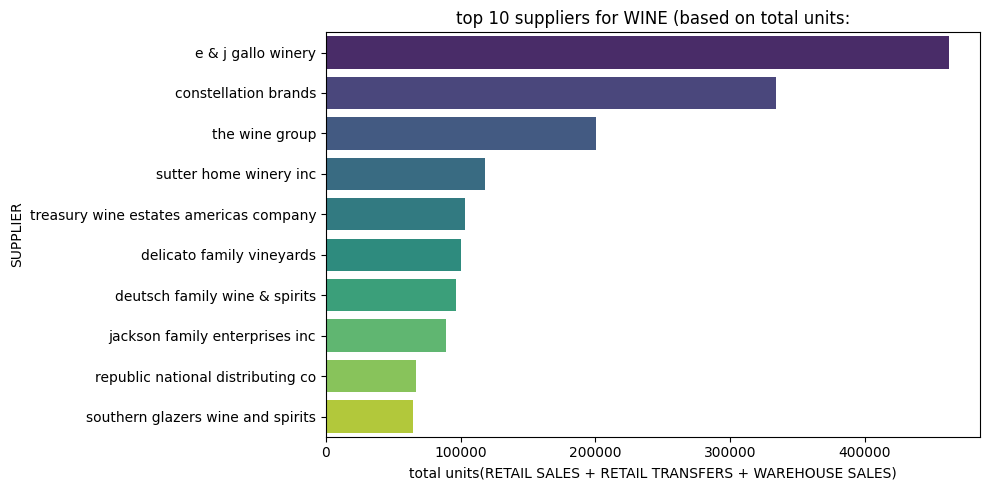


 top 10 suppliers for LIQUOR (based on total units:
                             SUPPLIER  TOTAL_CASES
27           diageo north america inc    244520.40
55                 jim beam brands co    198727.06
100                        sazerac co    153079.16
9                     bacardi usa inc    126318.24
50       heaven hill distilleries inc    115331.24
86              pernod ricard usa llc    109366.65
15   brown-forman beverages worldwide     93083.04
42               fifth generation inc     92849.04
37                 e & j gallo winery     66215.02
88                proximo spirits inc     60751.60


C:\Users\2021\AppData\Local\Temp\ipykernel_20508\3859270139.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOTAL_CASES', y='SUPPLIER', data=supplier_summary_by_item_sorted.head(10), palette='viridis')


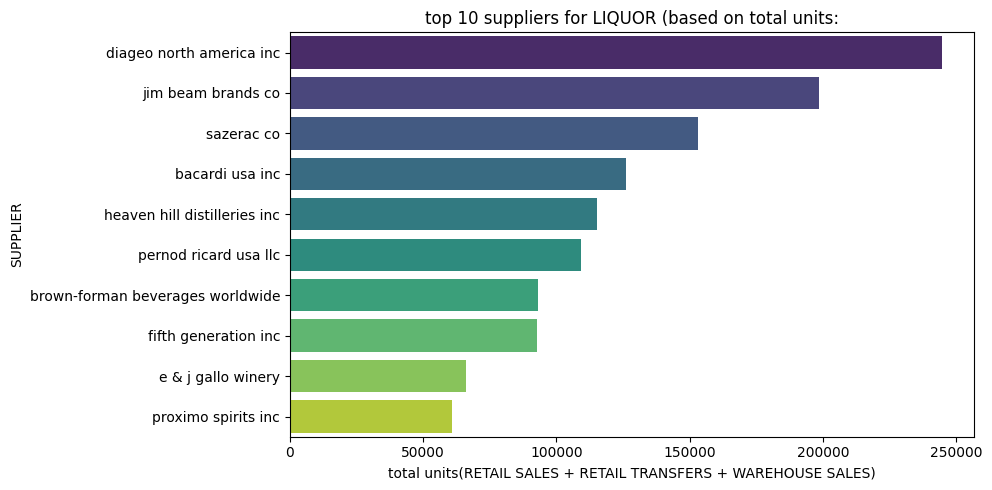

In [17]:
# top 10 suppliers for dominate item types 
df['TOTAL_CASES'] = df['RETAIL SALES'] + df['RETAIL TRANSFERS'] + df['WAREHOUSE SALES']
dominant_item_types = ['beer', 'wine', 'liquor']
for item_type in dominant_item_types:
    df_filtered = df[df['ITEM TYPE'] == item_type]
    if df_filtered.empty:
        print(f"can't find items for  {item_type.upper()}.")
        continue
    supplier_summary_by_item = df_filtered.groupby('SUPPLIER')['TOTAL_CASES'].sum().reset_index()

    
    supplier_summary_by_item_sorted = supplier_summary_by_item.sort_values(by='TOTAL_CASES', ascending=False)

    
    if supplier_summary_by_item_sorted.empty or supplier_summary_by_item_sorted['TOTAL_CASES'].sum() <= 0:
        print(f"\nno positive values found {item_type.upper()}. ")
        continue 

    
    print(f"\n top 10 suppliers for {item_type.upper()} (based on total units:")
    print(supplier_summary_by_item_sorted.head(10))

    
    plt.figure(figsize=(10, 5))
    sns.barplot(x='TOTAL_CASES', y='SUPPLIER', data=supplier_summary_by_item_sorted.head(10), palette='viridis')
    plt.title(f'top 10 suppliers for {item_type.upper()} (based on total units:')
    plt.xlabel('total units(RETAIL SALES + RETAIL TRANSFERS + WAREHOUSE SALES)')
    plt.ylabel('SUPPLIER')
    plt.tight_layout()
   
    
    plt.show() 

   



RETAIL SALES        2160899.37
RETAIL TRANSFERS    2133968.63
WAREHOUSE SALES     7781756.28
dtype: float64


C:\Users\2021\AppData\Local\Temp\ipykernel_20508\2069501411.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_channel_sales.index, y=total_channel_sales.values, palette='coolwarm')


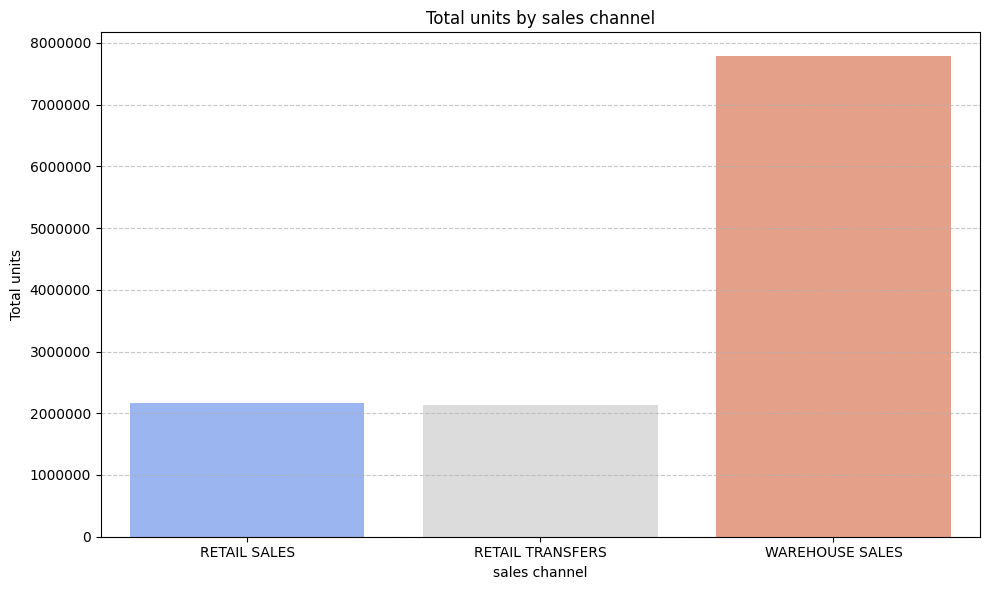

            RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
month_name                                                 
January        226211.07         226689.12        819013.63
February       157917.67         151672.76        513596.20
March          193852.33         201920.50        610713.70
April           80342.58          83633.90        298840.87
May             94953.10          88056.80        383791.58
June           188217.65         180463.73        725977.91
July           277927.73         273299.16       1109919.19
August         177740.39         178360.13        731789.78
September      254687.49         246880.75        988834.16
October        177467.37         181461.56        653917.94
November       199947.50         200400.71        638404.10
December       131634.49         121129.51        306957.22


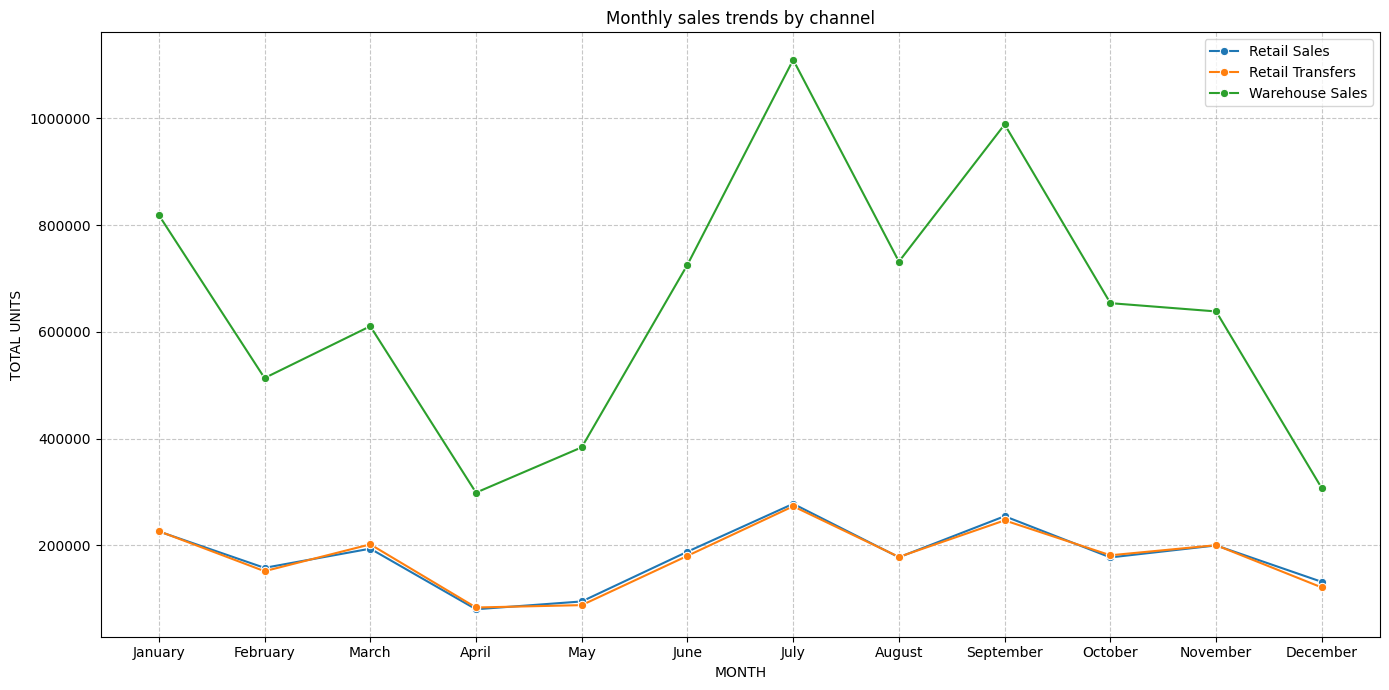

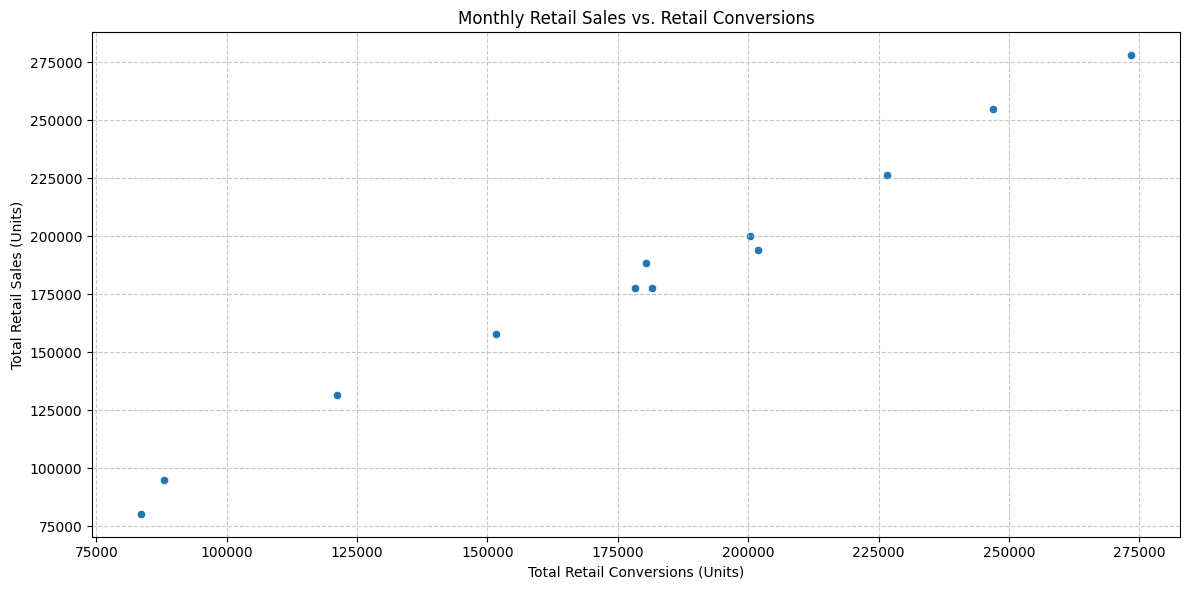

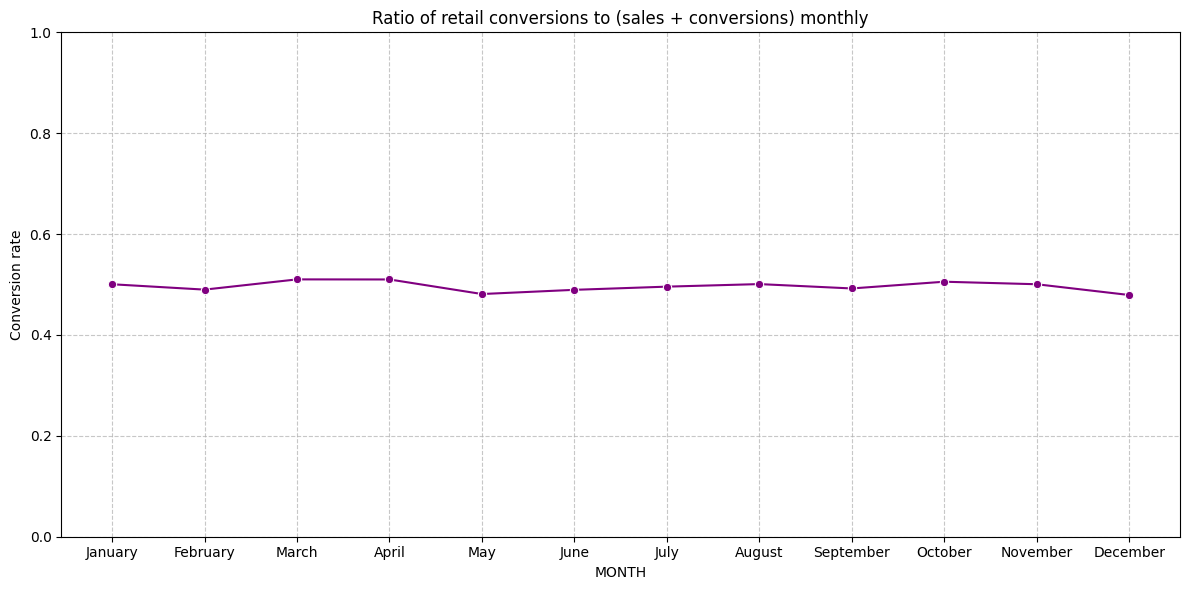

In [19]:


sales_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['month_name'] = df['MONTH'].map(month_names)
total_channel_sales = df[sales_cols].sum()

print(total_channel_sales)

# bar plot for total units per chanel sales 
plt.figure(figsize=(10, 6))
sns.barplot(x=total_channel_sales.index, y=total_channel_sales.values, palette='coolwarm')
plt.title('Total units by sales channel')
plt.xlabel('sales channel')
plt.ylabel('Total units')
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# 2.  monthely patern for evry chanel

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_channel_sales = df.groupby('month_name')[sales_cols].sum().reindex(month_order)


print(monthly_channel_sales)

plt.figure(figsize=(14, 7))
for col in sales_cols:
    sns.lineplot(x=monthly_channel_sales.index, y=monthly_channel_sales[col], label=col.replace('_', ' ').title(), marker='o')

plt.title('Monthly sales trends by channel')
plt.xlabel('MONTH')
plt.ylabel('TOTAL UNITS')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# 3. Analyzing the relationship between retail conversions and retail sales
# Collect monthly retail sales and conversion data for correlation analysis.
monthly_retail_data = df.groupby('month_name')[['RETAIL SALES', 'RETAIL TRANSFERS']].sum().reindex(month_order)


monthly_retail_data['transfer_to_sales_ratio'] = monthly_retail_data['RETAIL TRANSFERS'] / (monthly_retail_data['RETAIL SALES'] + monthly_retail_data['RETAIL TRANSFERS'])

monthly_retail_data['transfer_to_sales_ratio'] = monthly_retail_data['transfer_to_sales_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)


#Draw a scatterplot of retail sales vs. retail conversions to visualize the relationship.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RETAIL TRANSFERS', y='RETAIL SALES', data=monthly_retail_data)
plt.title('Monthly Retail Sales vs. Retail Conversions')
plt.xlabel('Total Retail Conversions (Units)')
plt.ylabel('Total Retail Sales (Units)')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# Draw a line chart of conversion to sales ratio over the months.
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_retail_data.index, y='transfer_to_sales_ratio', data=monthly_retail_data, marker='o', color='purple')
plt.title('Ratio of retail conversions to (sales + conversions) monthly')
plt.xlabel('MONTH')
plt.ylabel('Conversion rate')
plt.ylim(0, 1) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()





In [20]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [28]:
df.to_csv('Warehouse_and_Retail_Sales2.csv',index=False)

In [23]:
df.head()

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date,month_name,quarter,total_cases,month_name
0,2020,1,republic national distributing co,100009,BOOTLEG RED - 750ML,wine,0.00,0.0,2.0,2020-01-01,January,1,2.00,January
1,2020,1,pwswn inc,100024,MOMENT DE PLAISIR - 750ML,wine,0.00,1.0,4.0,2020-01-01,January,1,5.00,January
2,2020,1,reliable churchill lllp,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,beer,0.00,0.0,1.0,2020-01-01,January,1,1.00,January
3,2020,1,lanterna distributors inc,100145,SCHLINK HAUS KABINETT - 750ML,wine,0.00,0.0,1.0,2020-01-01,January,1,1.00,January
4,2020,1,dionysos imports inc,100293,SANTORINI GAVALA WHITE - 750ML,wine,0.82,0.0,0.0,2020-01-01,January,1,0.82,January


In [24]:
df.drop('month_name',axis=1)

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date,quarter,total_cases
0,2020,1,republic national distributing co,100009,BOOTLEG RED - 750ML,wine,0.00,0.0,2.00,2020-01-01,1,2.00
1,2020,1,pwswn inc,100024,MOMENT DE PLAISIR - 750ML,wine,0.00,1.0,4.00,2020-01-01,1,5.00
2,2020,1,reliable churchill lllp,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,beer,0.00,0.0,1.00,2020-01-01,1,1.00
3,2020,1,lanterna distributors inc,100145,SCHLINK HAUS KABINETT - 750ML,wine,0.00,0.0,1.00,2020-01-01,1,1.00
4,2020,1,dionysos imports inc,100293,SANTORINI GAVALA WHITE - 750ML,wine,0.82,0.0,0.00,2020-01-01,1,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...
307640,2020,9,dops inc,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,beer,0.00,0.0,1.00,2020-09-01,3,1.00
307641,2020,9,anheuser busch inc,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,beer,372.45,315.0,3586.88,2020-09-01,3,4274.33
307642,2020,9,heineken usa,97942,TECATE 4/6 LNNR - 12OZ,beer,7.79,0.0,4.00,2020-09-01,3,11.79
307643,2020,9,reliable churchill lllp,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,beer,0.00,0.0,2.00,2020-09-01,3,2.00


In [26]:
df['month_name'] = df['month'].map(month_names)

In [27]:
df.head()

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date,month_name,quarter,total_cases,month_name
0,2020,1,republic national distributing co,100009,BOOTLEG RED - 750ML,wine,0.00,0.0,2.0,2020-01-01,January,1,2.00,January
1,2020,1,pwswn inc,100024,MOMENT DE PLAISIR - 750ML,wine,0.00,1.0,4.0,2020-01-01,January,1,5.00,January
2,2020,1,reliable churchill lllp,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,beer,0.00,0.0,1.0,2020-01-01,January,1,1.00,January
3,2020,1,lanterna distributors inc,100145,SCHLINK HAUS KABINETT - 750ML,wine,0.00,0.0,1.0,2020-01-01,January,1,1.00,January
4,2020,1,dionysos imports inc,100293,SANTORINI GAVALA WHITE - 750ML,wine,0.82,0.0,0.0,2020-01-01,January,1,0.82,January


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   year              307645 non-null  int64         
 1   month             307645 non-null  int64         
 2   supplier          307645 non-null  object        
 3   item_code         307645 non-null  object        
 4   item_description  307645 non-null  object        
 5   item_type         307645 non-null  object        
 6   retail_sales      307642 non-null  float64       
 7   retail_transfers  307645 non-null  float64       
 8   warehouse_sales   307645 non-null  float64       
 9   date              307645 non-null  datetime64[ns]
 10  month_name        307645 non-null  object        
 11  quarter           307645 non-null  int32         
 12  total_cases       307642 non-null  float64       
 13  month_name        307645 non-null  object        
dtypes: d